<a href="https://colab.research.google.com/github/amitarav16/deep_learning/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [0]:
#loading the dataset 
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [0]:
#normalizing the input
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype('float32')
x_test = x_test/255

In [29]:
input_shape = (28,28,1)
#creating model
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

W0712 11:26:17.554033 140589268387712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0712 11:26:17.565295 140589268387712 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
#compiling model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#training model
model.fit(x_train,y_train,epochs=10)

W0712 11:29:13.445215 140589268387712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 44s 737us/step - loss: 0.2000 - acc: 0.9402
Epoch 2/10
60000/60000 [==============================] - 44s 728us/step - loss: 0.0784 - acc: 0.9761
Epoch 3/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.0555 - acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 43s 725us/step - loss: 0.0420 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.0322 - acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0263 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.0247 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.0194 - acc: 0.9935
Epoch 9/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0190 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] - 43s 724us/step - loss: 

In [32]:
#evaluating model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 185us/step


[0.06027747198881334, 0.9842]

8


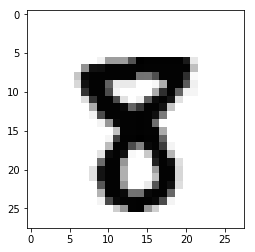

In [40]:
image_index = 128
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())